In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

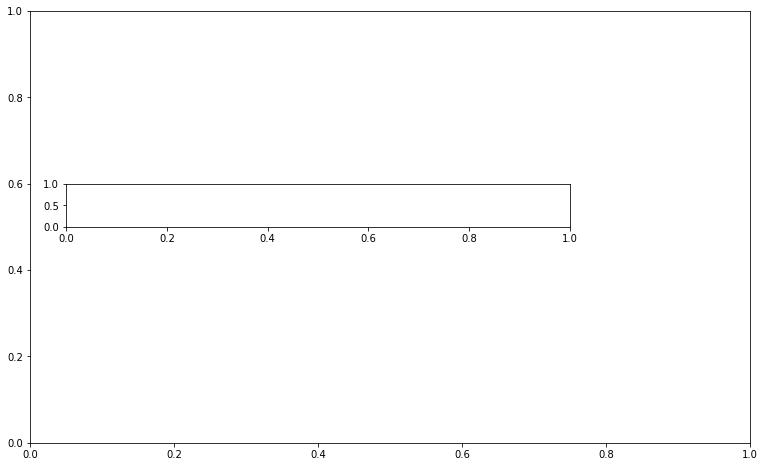

In [2]:
!pip3 install researchpy

    100% |████████████████████████████████| 10.0MB 160kB/s ta 0:00:011
    100% |████████████████████████████████| 8.7MB 185kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 20.2MB 83kB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 235kB 1.4MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.1

In [2]:
from sklearn.preprocessing import scale

In [25]:
import statsmodels.api as sm
from scipy import stats

In [4]:
import researchpy as rp

In [5]:
bike_data_hour=pd.read_csv('hour.csv')
bike_data_day=pd.read_csv('day.csv')

In [6]:
#bike_data_hour

In [7]:
bike_data_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
bike_data=bike_data_day[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [9]:
bike_data.to_csv("/home/syed/Quarantined/ML/Python_ipynb/bike_data.csv")

In [10]:
bike_data['season'].unique()

array([1, 2, 3, 4])

In [11]:
bike_data['workingday'].unique()

array([0, 1])

In [13]:
bike_data['holiday'].unique()

array([0, 1])

In [14]:
bike_data['weathersit'].unique()

array([2, 1, 3])

In [15]:
bike_data.weathersit.unique()

array([2, 1, 3])

## T-tests

In [18]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


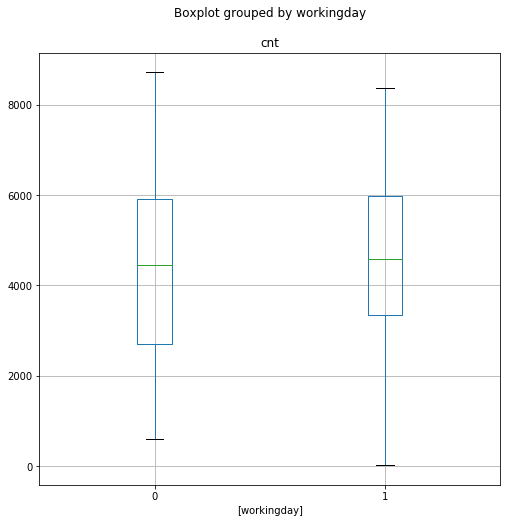

In [20]:
bike_data.boxplot(column=['cnt'],by=['workingday'],figsize=(8,8))

In [21]:
sample1=bike_data[bike_data.workingday==1]
sample2=bike_data[bike_data.workingday==0]

In [22]:
sample1.shape,sample2.shape

((500, 7), (231, 7))

In [23]:
#Resampling sample1 to have same number of samples as sample2
sample11=sample1.sample(231)

In [24]:
sample11.shape

(231, 7)

Levene test is nothing but ANOVA(F-Test) for variance not mean

W = (n . sum(Xk-Xg)**2/k-1[degrees of freedom])/((Xi-Xk)**2/(N-k))

In [26]:
stats.levene(sample11.cnt,sample2.cnt)

LeveneResult(statistic=2.286392988308972, pvalue=0.1311995931279354)

In [27]:
stats.ttest_ind(sample11.cnt,sample2.cnt)

Ttest_indResult(statistic=0.8309062686377614, pvalue=0.406457644848771)

Thus we conclude that the difference in mean and variance is not significant
This implies that working day has no significance on the number of bikes rented that day 

Now we shall examine if temperature has a significant difference on the number of bikes rented on a particular day

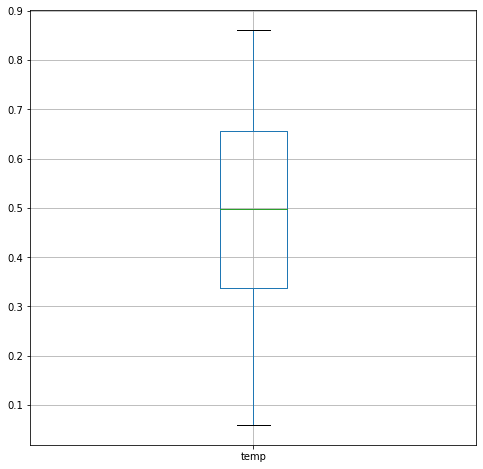

In [30]:
bike_data[['temp']].boxplot(figsize=(8,8))

In [33]:
bike_data['gtmean']=bike_data['temp']>bike_data['temp'].mean()

In [37]:
bike_data.gtmean.unique()

array([False,  True])

In [43]:
bike_data.groupby('gtmean')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
gtmean,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


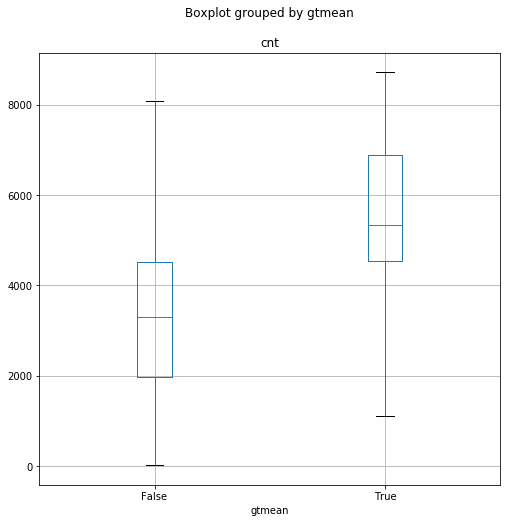

In [44]:
bike_data.boxplot(column=['cnt'],by='gtmean',figsize=(8,8))

In [47]:
sample21=bike_data[bike_data['gtmean']==True]
sample22=bike_data[bike_data['gtmean']==False]
sample21.shape,sample22.shape
sample21=sample21.sample(364)

Comparing the Variances and means of the 2 samples

In [49]:
stats.levene(sample21['cnt'],sample22['cnt'])

LeveneResult(statistic=4.86026678118579, pvalue=0.02779501099323156)

Before comparing the means we have to verify whether the residuals follows a normal distribution 

(array([ 1.,  7., 18., 32., 52., 85., 66., 60., 30., 13.]),
 array([-3.2013563 , -2.65314314, -2.10492998, -1.55671681, -1.00850365,
        -0.46029049,  0.08792267,  0.63613583,  1.18434899,  1.73256216,
         2.28077532]),
 <a list of 10 Patch objects>)

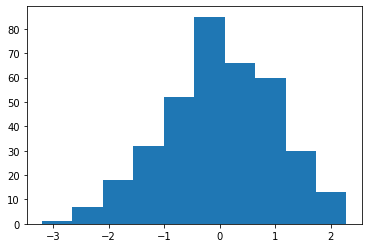

In [53]:
diff=scale(np.array(sample21['cnt'])-np.array(sample22['cnt']))
plt.hist(diff)

The difference array is approximately normal
Thus the assumption of t test that the distribution is normal holds true

In [50]:
stats.ttest_ind(sample21['cnt'],sample22['cnt'])

Ttest_indResult(statistic=18.89308600400961, pvalue=4.660684744016736e-65)

The p value is way below 0.05 or 0.01 for 95% or 99% confidence intervals. Thus the difference in mean is statistically significant


((array([-2.89390132, -2.60322082, -2.43909133, -2.32236579, -2.23068127,
         -2.15462424, -2.08930527, -2.03184595, -1.98040307, -1.9337225 ,
         -1.89091076, -1.85130798, -1.81441238, -1.7798332 , -1.74725991,
         -1.71644151, -1.68717209, -1.65928058, -1.6326232 , -1.60707795,
         -1.58254034, -1.55892018, -1.53613907, -1.5141284 , -1.49282777,
         -1.4721837 , -1.45214864, -1.43268009, -1.41373991, -1.39529372,
         -1.37731045, -1.35976189, -1.34262235, -1.3258684 , -1.30947857,
         -1.29343314, -1.27771398, -1.26230434, -1.24718875, -1.23235287,
         -1.21778338, -1.20346791, -1.18939491, -1.17555361, -1.16193392,
         -1.14852643, -1.13532228, -1.12231317, -1.10949126, -1.09684921,
         -1.08438008, -1.0720773 , -1.05993468, -1.04794637, -1.0361068 ,
         -1.02441072, -1.01285312, -1.00142926, -0.99013462, -0.97896489,
         -0.96791599, -0.956984  , -0.9461652 , -0.93545603, -0.92485308,
         -0.9143531 , -0.90395298, -0.

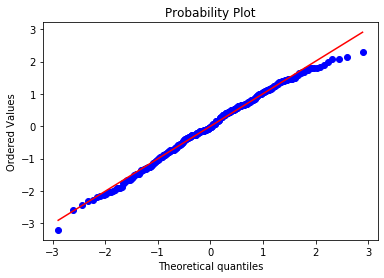

In [54]:
stats.probplot(diff,plot=plt)

Welsch's T test is a t test for unequal variances

In [55]:
descriptives,results=rp.ttest(sample21['cnt'],sample22['cnt'],equal_variances=False)

In [56]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5607.730769,1471.538171,77.129558,5456.053902,5759.407636
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4497.697802,1934.796984,71.708347,4356.917650,4638.477955


In [57]:
results

,Welch's t-test,results
0,Difference (cnt - cnt) =,2220.0659
1,Degrees of freedom =,712.3705
2,t =,18.8931
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4004
7,Hedge's g =,1.3990
8,Glass's delta =,1.5087
9,r =,0.5778


# ANOVA
Examining the effect of categorical variables on a continuous variable

## One-way ANOVA 
 Examining whether weather affects the bike rental
ANOVA is used since there are more than 2 categories
Alternate way could be to conduct multiple t tests

In [58]:
from statsmodels.formula.api import ols

In [60]:
bike_data=bike_data.drop('gtmean',axis=1)

In [62]:
bike_data.shape

(731, 7)

In [64]:
bike_data.weathersit.unique()

array([2, 1, 3])

In [66]:
bike_data.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


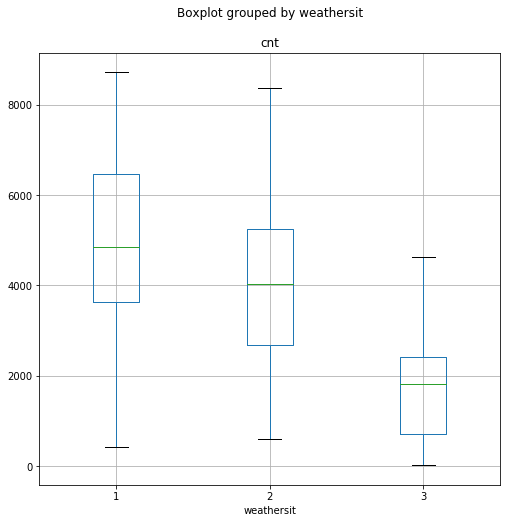

In [67]:
bike_data.boxplot(column=['cnt'],by='weathersit',figsize=(8,8))

In [73]:
weather1=bike_data[bike_data['weathersit']==1]['cnt']
weather2=bike_data[bike_data['weathersit']==2]['cnt']
weather3=bike_data[bike_data['weathersit']==3]['cnt']

In [74]:
stats.f_oneway(weather1,weather2,weather3)

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [76]:
stats.f_oneway(weather1,weather3)#,weather3)

F_onewayResult(statistic=55.00957186188967, pvalue=5.446215924898237e-13)

Since the p value is <<<<0.05 or 0.01 we can say that with more than 99% confidence that weather does affect the bike rental counts

The ANOVA simply tells us that there is significant differences in the differences, but which samples?
This is dictated using Tukey's HSD(Honestly significant difference)

In [80]:
from statsmodels.stats.multicomp import MultiComparison
multi_comp=MultiComparison(bike_data['cnt'],bike_data['weathersit'])
multi_result=multi_comp.tukeyhsd()
print(multi_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


The above table tells us that difference between all the groups is statistically significant

## Two way ANOVA
Two way ANOVA tells us the affect of 2 categorical variables

In [85]:
model = ols('cnt ~ C(weathersit)',bike_data).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           3.11e-17
Time:                        00:20:00   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85.567     56.994      0.000  

In [86]:
model = ols('cnt ~ C(season)',bike_data).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           6.72e-67
Time:                        00:22:09   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.334      0.000    2375.223  

In [87]:
model = ols('cnt ~ C(weathersit) + C(season)',bike_data).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.13e-87
Time:                        00:23:11   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116.990     25.062      0.000  

In [88]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


In [89]:
model = ols('cnt ~ C(weathersit) * C(season)',bike_data).fit()
print(model.summary())

OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           5.25e-85
Time:                        00:25:52   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         

There are 2 p values in the weather and season interaction that are less than 0.05, which mean there is a statistical difference

In [90]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


The above table clearly states that the combination of season and weather is a statistically significant factor

## Chi-Squared Test

In [101]:
ecomm_data1=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [106]:
from scipy.stats import chi2_contingency

In [105]:
ecomm_data1['Recommended IND'].unique()

array([1, 0])

In [93]:
ecomm_data=ecomm_data[['Rating','Recommended IND']]

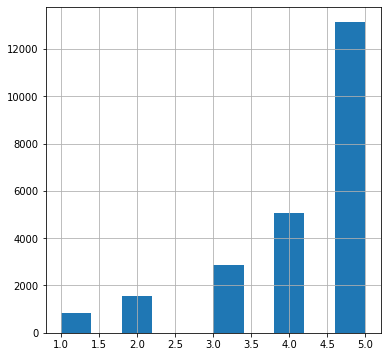

In [96]:
ecomm_data.Rating.hist(figsize=(6,6))

In [98]:
df=pd.crosstab(ecomm_data['Recommended IND'],ecomm_data['Rating'])
df

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13106


In [107]:
chi2,p_value,degrees_of_freedom,expected_values=chi2_contingency(df.values)

In [108]:
chi2

16722.503172306744

In [109]:
p_value

0.0

In [110]:
expected_values

array([[  149.57097846,   278.00306566,   509.99795623,   901.86681427,
         2332.56118539],
       [  692.42902154,  1286.99693434,  2361.00204377,  4175.13318573,
        10798.43881461]])

In [111]:
expected_df=pd.DataFrame({'0':expected_values[0],'1':expected_values[1]})

In [122]:
rating_recommended=ecomm_data[ecomm_data['Recommended IND']==1]
rating_not_recommended=ecomm_data[ecomm_data['Recommended IND']==0]

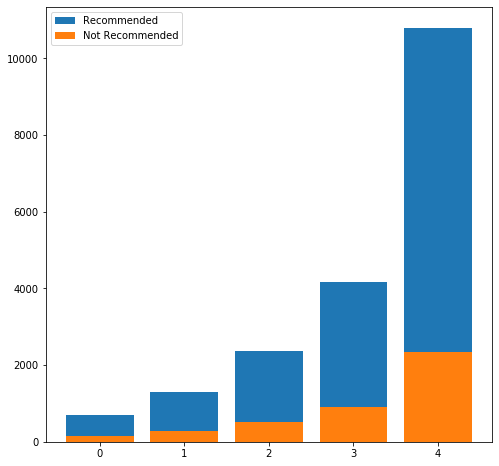

In [128]:
plt.figure(figsize=(8,8))
plt.bar(expected_df.index,height=expected_df['1'],label="Recommended")
plt.bar(expected_df.index,height=expected_df['0'],label="Not Recommended")
plt.legend()
plt.show()


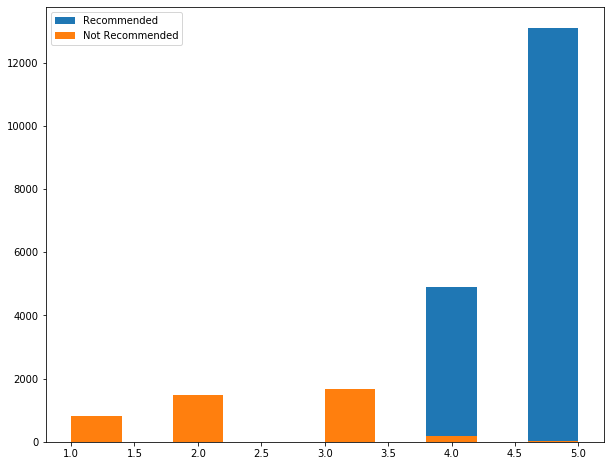

In [125]:
plt.figure(figsize=(10,8))
plt.hist(rating_recommended['Rating'],label="Recommended")
plt.hist(rating_not_recommended['Rating'],label="Not Recommended")
plt.legend()
plt.show()